# CSCI 3220: Python for Data Science and AI

### Final Exam
### Total Points: 50 + Bonus (15 Points)
### Total Time: 36 Hours
### Start Time: May 14, 10AM, End Time: May 15, 10PM


##### ***Write the code in Jupyter notebook (ipynb file) with proper comments.
##### ***Rename the file with your student ID and submit it in Moodle.
##### ***You could use Google Colab for faster training.
##### ***You are allowed to use any available libraries in python to implement the codes.
##### ***Add proper citation if you take help from a different source (not from the textbook).

In [1]:
#Name: Thien Tran
#Student ID: 2575712

import numpy as np
import pandas as pd

## 1. Implement two classification algorithms (Support Vector Machines and Decision Tree Classifier) for the wine dataset (scikit-learn toy dataset) using the scikit-learn library. The wine dataset is a multiclass classification problem. Compare the performance (accuracy) using the 10-fold cross-validation method and display the top-performing classifier. [Points: 15]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

wine = load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target)

#### Support Vector Machines

In [43]:
from sklearn import svm

#Build Model
svmModel = svm.SVC()
svmModel.fit(x_train, y_train)

y_predictions = svmModel.predict(x_test)
print("Predictions:", y_predictions)
print("True Result:", y_test)

Predictions: [0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 0 1 1 1 1 1]
True Result: [0 2 1 0 1 2 0 1 0 1 2 1 0 0 1 2 1 2 1 0 0 0 1 1 0 1 1 1 2 2 2 2 0 2 1 0 2
 2 1 0 2 2 1 2 0]


In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def runKFold(amountOfIterations):
    for i in range(amountOfIterations):
        x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target)
        kfold = KFold(n_splits=10, random_state=11, shuffle=True)
        scores = cross_val_score(estimator=svmModel, X=x_test, y=y_test, cv=kfold)
        print("10-Fold Run Mean Accuracy: %.3f" %(scores.mean()))

In [45]:
runKFold(8)

10-Fold Run Mean Accuracy: 0.640
10-Fold Run Mean Accuracy: 0.685
10-Fold Run Mean Accuracy: 0.605
10-Fold Run Mean Accuracy: 0.770
10-Fold Run Mean Accuracy: 0.705
10-Fold Run Mean Accuracy: 0.645
10-Fold Run Mean Accuracy: 0.705
10-Fold Run Mean Accuracy: 0.695


#### Decision Tree Classifier

In [46]:
#Citation: learned about the Decision Tree Classifier from scikit-learn documentation (since it wasn't in the book)
#Link: https://scikit-learn.org/stable/modules/tree.html

from sklearn import tree

#Build Model
treeModel = tree.DecisionTreeClassifier()
treeModel.fit(x_train, y_train)

y_predictions = treeModel.predict(x_test)
print("Predictions:", y_predictions)
print("True Result:", y_test)

Predictions: [0 2 1 0 1 2 0 1 0 1 2 1 0 0 1 2 1 2 1 0 2 0 1 1 0 0 1 1 2 2 2 2 0 1 2 0 2
 2 1 0 2 2 1 1 0]
True Result: [0 2 1 0 1 2 0 1 0 1 2 1 0 0 1 2 1 2 1 0 0 0 1 1 0 1 1 1 2 2 2 2 0 2 1 0 2
 2 1 0 2 2 1 2 0]


In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def runKFold(amountOfIterations):
    for i in range(amountOfIterations):
        x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target)
        kfold = KFold(n_splits=10, random_state=11, shuffle=True)
        scores = cross_val_score(estimator=treeModel, X=x_test, y=y_test, cv=kfold)
        print("10-Fold Run Mean Accuracy: %.3f" %(scores.mean()))

In [48]:
runKFold(8)

10-Fold Run Mean Accuracy: 0.905
10-Fold Run Mean Accuracy: 0.845
10-Fold Run Mean Accuracy: 0.765
10-Fold Run Mean Accuracy: 0.865
10-Fold Run Mean Accuracy: 0.805
10-Fold Run Mean Accuracy: 0.750
10-Fold Run Mean Accuracy: 0.925
10-Fold Run Mean Accuracy: 0.800


#### Comparison

Based on running 8 sets of 10-fold cross validation multiple times on randomized test data and target sets upon both the Support Vector Machines and Decision Tree Classifier models, I would say that the decision tree had a noticably higher mean accuracy compared to the support vector machines. The mean accuracies of the decision tree had a range of about 75.0% to 92.5% mean accuracy while the support vector machines had 60.5% to 77.0% accuracy. This means that the worst performing 10-Fold validation of the decision tree was only slightly worse than the best performing 10-Fold validation of the support vector machines.

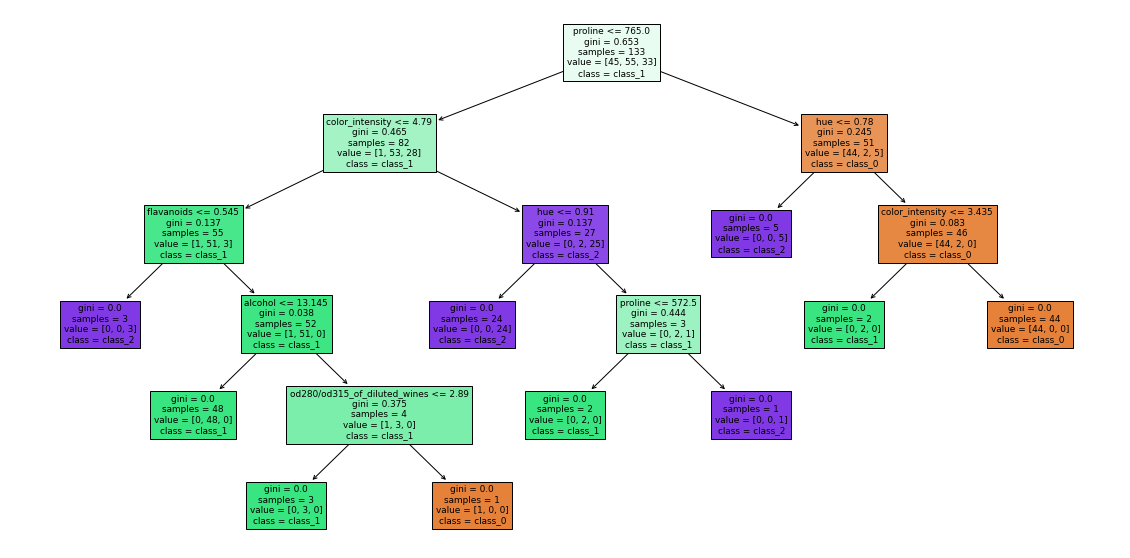

In [67]:
import matplotlib.pyplot as plt

#Citation: Learned how to plot trees from mljar
#Link: https://mljar.com/blog/visualize-decision-tree/
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(treeModel, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)

#### Bonus: Implement the Extreme Gradient Boosting (XGBoost) classifier and compare the performance with the other methods from question 1 in terms of weighted precision.


In [9]:
#Citation: 

## 2. Design and implement a recurrent neural network (LSTM) using Keras Library for the Reuters newswire classification dataset (Keras Toy Dataset). [Points: 20]

#### A. Split the dataset into train and test sets.

In [3]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Citation: learned about Reuters dataset from Keras documentation.
#Link: https://keras.io/api/datasets/reuters/

number_of_words = 10000
words_per_wire = 600

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=number_of_words)


X_train = pad_sequences(X_train, maxlen=words_per_wire)
X_test = pad_sequences(X_test, maxlen=words_per_wire) 

print('x_train:', X_train.shape)
print('x_test:', X_test.shape)

x_train: (8982, 600)
x_test: (2246, 600)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

#Build Model
rnn = Sequential()
rnn.add(Embedding(input_dim = number_of_words, output_dim = 128))
rnn.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
rnn.add(Dense(46, activation='softmax'))
rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### B. Print the summary and architecture of the network.

In [5]:
#Model Architecture
rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 46)                5934      
Total params: 1,417,518
Trainable params: 1,417,518
Non-trainable params: 0
_________________________________________________________________


#### C. Use 10% of the training data as a validation set. Plot the loss and accuracy for each epoch in the training and validation set.

In [6]:
history = rnn.fit(X_train, y_train, epochs=20, batch_size=48, validation_split=0.1)

Epoch 1/20
169/169 [==============================] - 215s 1s/step - loss: 2.6645 - accuracy: 0.3656 - val_loss: 2.0595 - val_accuracy: 0.4549
Epoch 2/20
169/169 [==============================] - 220s 1s/step - loss: 1.8168 - accuracy: 0.5191 - val_loss: 1.7869 - val_accuracy: 0.5606
Epoch 3/20
169/169 [==============================] - 217s 1s/step - loss: 1.6262 - accuracy: 0.5755 - val_loss: 1.6970 - val_accuracy: 0.5628
Epoch 4/20
169/169 [==============================] - 213s 1s/step - loss: 1.4460 - accuracy: 0.6284 - val_loss: 1.5382 - val_accuracy: 0.6096
Epoch 5/20
169/169 [==============================] - 214s 1s/step - loss: 1.2440 - accuracy: 0.6774 - val_loss: 1.4593 - val_accuracy: 0.6407
Epoch 6/20
169/169 [==============================] - 217s 1s/step - loss: 1.0543 - accuracy: 0.7131 - val_loss: 1.4734 - val_accuracy: 0.6374
Epoch 7/20
169/169 [==============================] - 223s 1s/step - loss: 0.9422 - accuracy: 0.7494 - val_loss: 1.3704 - val_accuracy: 0.6496

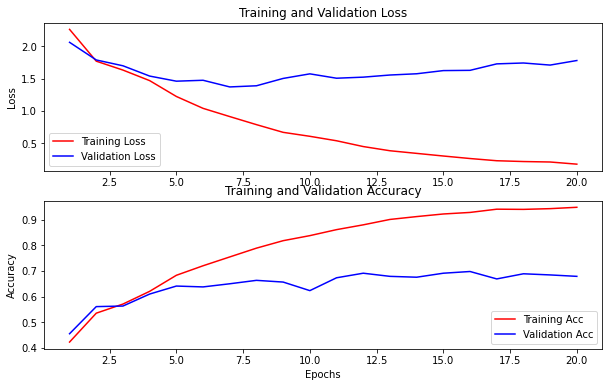

In [7]:
#Citation: Technically part of the book, but used direct plotting code from the ML_Keras_Demo since it works fine and is part of the class.
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

#### D. Use EarlyStopping to stop the training if there is no improvement and ModelCheckpoint to save the best model based on the validation accuracy.

In [13]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

#Rebuild Model
rnn2 = Sequential()
rnn2.add(Embedding(input_dim = number_of_words, output_dim = 128))
rnn2.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
rnn2.add(Dense(46, activation='softmax'))
rnn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Stop model after one consistent local peak to avoid overfitting since validation accuracy does not significantly improve afterwards
#Patience = 2 to ensure that a single epoch validation accuracy decrease due to just noise will not stop model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = rnn2.fit(X_train, y_train, epochs=20, batch_size=48, validation_split=0.1, callbacks=[es,mc])

Epoch 1/20
169/169 [==============================] - 236s 1s/step - loss: 2.7045 - accuracy: 0.3538 - val_loss: 2.1027 - val_accuracy: 0.4761

Epoch 00001: val_accuracy improved from -inf to 0.47608, saving model to model.h5
Epoch 2/20
169/169 [==============================] - 243s 1s/step - loss: 2.0147 - accuracy: 0.4971 - val_loss: 1.9028 - val_accuracy: 0.5161

Epoch 00002: val_accuracy improved from 0.47608 to 0.51613, saving model to model.h5
Epoch 3/20
169/169 [==============================] - 248s 1s/step - loss: 1.8372 - accuracy: 0.5282 - val_loss: 1.7590 - val_accuracy: 0.5539

Epoch 00003: val_accuracy improved from 0.51613 to 0.55395, saving model to model.h5
Epoch 4/20
169/169 [==============================] - 253s 1s/step - loss: 1.8092 - accuracy: 0.5599 - val_loss: 1.6954 - val_accuracy: 0.5729

Epoch 00004: val_accuracy improved from 0.55395 to 0.57286, saving model to model.h5
Epoch 5/20
169/169 [==============================] - 252s 1s/step - loss: 1.6733 - acc

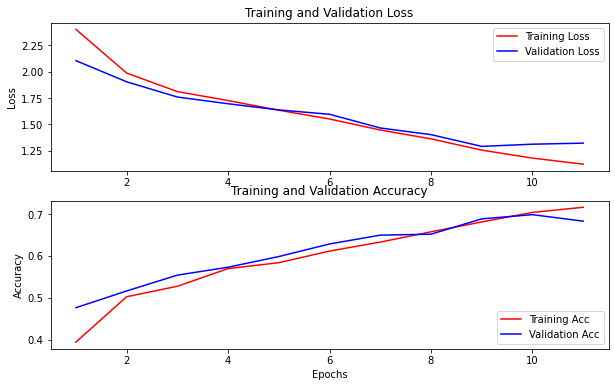

In [16]:
#Citation: Technically part of the book, but used direct plotting code from the ML_Keras_Demo since it works fine and is part of the class.
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

#### E. Based on the plot (question 2b), tune any two hyperparameters in the network. Explain why you want to tune these hyperparameters and how they will affect the model performance.

#### Bonus: Create a stacked network by combining the convolutional layer with LSTM from question 2. Is there any improvement in performance by adding the CNN layer?

## 3. Can we do 10-fold cross-validation to evaluate a neural network? If so, briefly explain how to do it? If not, explain why? [Points: 5]

Yes we can in a sense. Assuming that we have a sample, we can build different networks with different subsets of the sample while validating the models with other subsets. However, we can not evaluate a specific, created neural network using 10-fold cross-validation because each neural network would be, in a sense, uniquely specific to the sample set that was used to build that model and thus would be irregular compared to something like KNN.

## 4. What are the main differences between convolutional and recurrent neural networks? [Points: 5]

Convulational neural networks relies on covolution layers which is able to, simply put, consider more factors compared to a regular neural network. Recurrent neural networks, on the other hand, gives neural networks a sort of 'short term' memory which is ideal for sequences of data that may potentially stack ontop of one another.

## 5. What is the purpose of embedding layer in recurrent neural networks? Define pre-trained embeddings? [Points: 5]

The embedding layer in recurrent neural networks encodes labels to a certain 'dense-vector' representation which could potentially have lower dimensionality and thus lower memory utilization requirements compared to other encoding methods such as one-hot. Pre-trained embeddings are previous embeddings of previous related data which could be loaded into the current neural network to save training time, or even increase accuracy. 